In [1]:
pip install pyfpgrowth

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install mlxtend --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import pyfpgrowth
import os

In [6]:
import pandas as pd
import numpy as np
store_dataset= pd.read_csv('chess.csv', header = None)
store_dataset

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1,3,5,7,9,11,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
1,1,3,5,7,9,12,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
2,1,3,5,7,9,12,13,16,17,19,...,56,58,60,62,64,66,68,70,72,74
3,1,3,5,7,9,11,13,15,17,20,...,56,58,60,62,64,66,68,70,72,74
4,1,3,5,7,9,11,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3192,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3193,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3194,2,4,5,8,9,11,13,16,17,19,...,56,58,61,62,64,67,68,71,73,74


In [7]:
store_dataset = store_dataset.fillna(0)

In [8]:
store_dataset.astype(int)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1,3,5,7,9,11,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
1,1,3,5,7,9,12,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
2,1,3,5,7,9,12,13,16,17,19,...,56,58,60,62,64,66,68,70,72,74
3,1,3,5,7,9,11,13,15,17,20,...,56,58,60,62,64,66,68,70,72,74
4,1,3,5,7,9,11,13,15,17,19,...,56,58,60,62,64,66,68,70,72,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3192,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3193,2,4,5,7,9,11,13,16,17,19,...,56,58,61,62,64,67,68,70,73,74
3194,2,4,5,8,9,11,13,16,17,19,...,56,58,61,62,64,67,68,71,73,74


In [9]:
store_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3196 non-null   int64
 1   1       3196 non-null   int64
 2   2       3196 non-null   int64
 3   3       3196 non-null   int64
 4   4       3196 non-null   int64
 5   5       3196 non-null   int64
 6   6       3196 non-null   int64
 7   7       3196 non-null   int64
 8   8       3196 non-null   int64
 9   9       3196 non-null   int64
 10  10      3196 non-null   int64
 11  11      3196 non-null   int64
 12  12      3196 non-null   int64
 13  13      3196 non-null   int64
 14  14      3196 non-null   int64
 15  15      3196 non-null   int64
 16  16      3196 non-null   int64
 17  17      3196 non-null   int64
 18  18      3196 non-null   int64
 19  19      3196 non-null   int64
 20  20      3196 non-null   int64
 21  21      3196 non-null   int64
 22  22      3196 non-null   int64
 23  23      3196 

In [10]:
transactions= []
for sublist in store_dataset.values.tolist():
    clean_sublist=[item for item in sublist if item is not np.nan]
    transactions.append(clean_sublist)
print(transactions)
for iteration, item in enumerate(transactions):
  iteration
print(iteration)
#dataset
#remove_nan
#type(dataset)


[[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 12, 13, 16, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 47, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 51, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 46, 48, 51, 52, 54, 56, 58, 60, 63, 64, 66, 68, 70, 72, 74], [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 21, 23, 25, 27, 29, 31, 34, 36, 38, 40, 42, 44, 47, 48, 51, 52, 54, 56, 58, 60, 62, 64, 66, 6

In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
0,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
1,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
2,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
3,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
4,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,False,True,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
3192,False,True,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
3193,False,True,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
3194,False,True,False,True,True,False,False,True,True,False,...,False,True,True,False,False,True,False,True,True,False


In [12]:
df[0]=bool(False)
#if code finds any 0 then converted them false
df

,1,2,3,4,5,6,7,8,9,10,...,67,68,69,70,71,72,73,74,75,0
0,True,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False
1,True,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False
2,True,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False
3,True,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False
4,True,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,False,True,False,True,True,False,True,False,True,False,...,True,True,False,True,False,False,True,True,False,False
3192,False,True,False,True,True,False,True,False,True,False,...,True,True,False,True,False,False,True,True,False,False
3193,False,True,False,True,True,False,True,False,True,False,...,True,True,False,True,False,False,True,True,False,False
3194,False,True,False,True,True,False,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False


In [13]:
import time
from mlxtend.frequent_patterns import fpgrowth

threshold = 1
tot_time = []
threshold_val = []

for i in range(0,7):
  start = time.time()
  rules=fpgrowth(df, min_support=threshold, use_colnames=True)
  end = time.time()
  tot_time.append(end-start)
  threshold_val.append(threshold)
  threshold = threshold - 0.1
  print(rules)

Empty DataFrame
Columns: [support, itemsets]
Index: []
      support         itemsets
0    0.999687             (58)
1    0.996558             (52)
2    0.995307             (29)
3    0.991865             (40)
4    0.985294             (60)
..        ...              ...
617  0.903630      (34, 58, 5)
618  0.902691      (34, 29, 5)
619  0.901126      (34, 52, 5)
620  0.902378  (34, 29, 58, 5)
621  0.900814  (34, 58, 52, 5)

[622 rows x 2 columns]
       support              itemsets
0     0.999687                  (58)
1     0.996558                  (52)
2     0.995307                  (29)
3     0.991865                  (40)
4     0.985294                  (60)
...        ...                   ...
8222  0.805382      (40, 58, 52, 44)
8223  0.804130      (40, 58, 44, 29)
8224  0.801001      (40, 52, 29, 44)
8225  0.800688  (40, 44, 52, 58, 29)
8226  0.802253          (58, 60, 44)

[8227 rows x 2 columns]
        support                     itemsets
0      0.999687                    

Text(0, 0.5, 'Threshold')

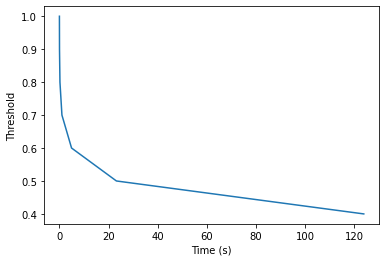

In [14]:
from matplotlib import pyplot as plt

plt.plot(tot_time, threshold_val, label='chess dataset')
plt.xlabel("Time (s)")
plt.ylabel("Threshold")
